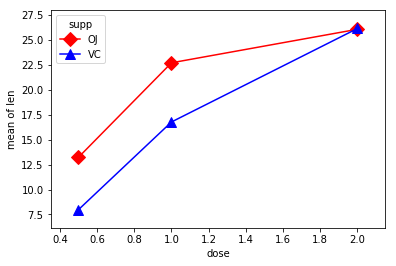

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
from scipy import stats
data = pd.read_csv("C:/Users/rushb/Downloads/ToothGrowth.csv")
fig=interaction_plot(data.dose,data.supp,data.len,colors=['red','blue'], markers=['D','^'], ms=10)


In [53]:
N = len(data.len)
df_a = len(data.supp.unique()) - 1
df_b = len(data.dose.unique()) - 1
df_axb = df_a*df_b 
df_w = N - (len(data.supp.unique())*len(data.dose.unique()))
grand_mean = data['len'].mean()
ssq_a = sum([(data[data.supp ==i].len.mean()-grand_mean)**2 for i in data.supp])
ssq_b = sum([(data[data.dose ==i].len.mean()-grand_mean)**2 for i in data.dose])
ssq_t = sum((data.len - grand_mean)**2)


In [54]:
ssq_a

205.35000000000005

In [101]:
x=0
for i in data.supp:
    x=x + (data[data.supp ==i].len.mean()-grand_mean)**2
    ssq=x
print(ssq)


205.35000000000005


In [107]:
vc =data[data.supp == 'VC']
oj =data[data.supp == 'OJ']
vc_dose_means = [vc[vc.dose==d].len.mean() for d in vc.dose]
oj_dose_means =[oj[oj.dose==d].len.mean() for d in oj.dose]

ssq_w=sum((oj.len- oj_dose_means)**2) + sum((vc.len-vc_dose_means)**2)

ssq_axb = ssq_t - ssq_a - ssq_b -ssq_w

print(ssq_axb)

108.31900000000155


In [108]:
ms_a = ssq_a/df_a
ms_b = ssq_b/df_b
ms_axb = ssq_axb/df_axb
ms_w = ssq_w/df_w
f_a = ms_a/ms_w
f_b = ms_b/ms_w
f_axb = ms_axb/ms_w

In [109]:
p_a = stats.f.sf(f_a, df_a, df_w)
p_b = stats.f.sf(f_b, df_b, df_w)
p_axb = stats.f.sf(f_axb, df_axb, df_w)

In [110]:
results = {'sum_sq':[ssq_a,ssq_b,ssq_axb,ssq_w],
            'df':[df_a,df_b,df_axb,df_w],
             'F':[f_a,f_b,f_axb,'NaN'],
              'PR(>F)':[p_a,p_b,p_axb,'NaN']}
columns=['sum_sq','df','F','PR(>F)']

aov_table1=pd.DataFrame(results,columns=columns,index=['supp','dose','supp:dose','Residual'])

aov_table1

,sum_sq,df,F,PR(>F)
supp,205.350000,1,15.572,0.000231183
dose,2426.434333,2,92,4.04629e-18
supp:dose,108.319000,2,4.10699,0.0218603
Residual,712.106000,54,NaN,NaN
